# Sports Data Analytics
## Task: Event Visualisation in Football

### Import

In [13]:
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib.patches as patches

### Set file path and create tree and root variables

In [14]:
# Create file path
filepath_input = "f24-21-2013-717560-eventdetails.xml"

# Create variables for file tree and root
tree = ET.parse(filepath_input)
game = tree.getroot()

### Team ID and player dictionaries

In [15]:
# Create Team IDs
team_dict = {game[0].attrib["home_team_id"]: game[0].attrib["home_team_name"],
            game[0].attrib["away_team_id"]: game[0].attrib["away_team_name"]}

# Create two lists of OPTA player IDs for both teams
id_list_genoa = [e.lstrip() for e in game[0][0][4].attrib['value'].split(',')]
id_list_inter = [e.lstrip() for e in game[0][1][6].attrib['value'].split(',')]

# Merge both lists
id_list = id_list_genoa + id_list_inter

# Create ltwo ists with jersey numbers for each team in the same order as the OPTA player ID lists
jersey_list_genoa = [e.lstrip() for e in game[0][0][5].attrib['value'].split(',')]
jersey_list_inter = [e.lstrip() for e in game[0][1][4].attrib['value'].split(',')]

# Manually created two lists with full names of players in the same order as the two jersey number lists above
genoa_name_list = ['Mattia Perin', 'Sime Vrsaljko', 'Luca Antonelli', 'Francesco Lodi', 'Daniele Portanova', 'Thomas Manfredini', 'Juraj Kucka', 'Isaac Cofie', 'Alberto Gilardino', 'Mario Santana', 'Andrea Bertolacci', 'Mario Sampirisi', 'Sebastien De Maio', 'Alessandro Gamberini', 'Tiberio Velocci', 'Matuzalém', 'Antonio Donnarumma', 'Lukas Zima', 'Stefano Sturaro', 'Moussa Konaté', 'Antonio Floro Flores', 'Daniel Jara', 'Allan Blaze']
inter_name_list = ['Samir Handanovic', 'Jonathan', 'Yuto Nagatomo', 'Juan Jesus', 'Andrea Ranocchia', 'Hugo Campagnaro', 'Zdravko Kuzmanovic', 'Esteban Cambiasso', 'Rodrigo Palacio', 'Ricardo Álvarez', 'Fredy Guarín', 'Marco Andreolli', 'Ishak Belfodil', 'Mauro Icardi', 'Mateo Kovacic', 'Luca Castellazzi', 'Gaby Mudingayi', 'Wallace Oliveira', 'Saphir Taider', 'Juan Pablo Carrizo', 'Álvaro Pereira', 'Rolando', 'Patrick Olsen']

# Merge both lists
combined_name_list = genoa_name_list + inter_name_list

#Create a dictionary with the OPTA player ID as the key and the corresponding full name as the value
players_dict = dict(zip(id_list, combined_name_list))

### Functions

In [16]:
# Create game ticker function
def ticker(game_on=0):
    # Show match info
    print(f"{game[0].attrib['season_name']} {game[0].attrib['competition_name']} game between {game[0].attrib['home_team_name']} (home) vs {game[0].attrib['away_team_name']} (away) on {game[0].attrib['game_date'][:10]}:\n")
    # looping through all events
    for event in game.iter("Event"):
        # create ticker variables
        type_id = event.attrib["type_id"]
        time = int(event.attrib["min"]) + 1
        team_name = team_dict[event.attrib["team_id"]]
        if "player_id" in event.attrib:
            player = players_dict[str(event.attrib["player_id"])]
       # Start and end of the game
        if type_id == "32":
            if game_on == 0:
                game_on = 1
                print(f"'{time}: The ball is rolling.\n")
        if type_id == "30":
            if game_on == 1:
                game_on = 0
                print(f"'{time}: The referee blows the whistle.\n")
        # Goals
        if type_id == "16":
            shot_location = {'17': 'the box', '16': 'the box'}
            hit_location = {'76': 'bottom left', '80': 'bottom right'}
            assisted_by_player = {"281": f"He was assisted by "}
            for qualifier in event:
                for e in shot_location.keys():
                    if qualifier.attrib["qualifier_id"] == e:
                        location_shot = shot_location[e]
                for i in hit_location.keys():
                    if qualifier.attrib["qualifier_id"] == i:
                        location_hit = hit_location[i]
                for assist in assisted_by_player.keys():
                    if qualifier.attrib["qualifier_id"] == assist:
                        assisted = assisted_by_player[assist]
                        player_assist = players_dict[qualifier.attrib["value"]]
            if assisted:
                print(f"'{time}: GOAL for {team_name}!\n     {player} scores from {location_shot}. His ball hits the {location_hit} of the goal.\n     {assisted}{player_assist}.\n")
            else:
                print(f"'{time}: GOAL for {team_name}!\n     {player} scores from {location_shot}. His ball hits the {location_hit} of the goal.\n")
        # Penalties
        if type_id == "58":
            print(f"'{time}: {team_name} concedes a penalty.\n")
        # Bookings
        booking_reason = {'13': 'a foul', '10': 'a hand ball', '11': 'a 6-seconds violation', '12': 'dangerous play',
                          '34': 'referee abuse', '35': 'an argument', '36': 'violent conduct', '37': 'wasting time',
                          '38': 'an excessive celebration', '39': 'interacting with the crowd'}
        booking_type = {'31': 'yellow card', '32': 'second yellow card', '33': 'red card'}
        
        if type_id == "17":
            for qualifier in event:
                for e in booking_reason.keys():
                    if qualifier.attrib["qualifier_id"] == e:
                        reason_booking = booking_reason[e]
                for i in booking_type.keys():
                    if qualifier.attrib["qualifier_id"] == i:
                        type_booking = booking_type[i]
            print(f"'{time}: {player} ({team_name}) receives a {type_booking} card for {reason_booking}.\n")
        # Substitutions
        if type_id == "18":
            print(f"'{time}: {team_name} makes a substitution: ")
            print(f"     {player} comes off the pitch...")
        if type_id == "19":
            print(f"     ... He is replaced by {player}.\n")
        # Skill moves
        if type_id == "42":
            print(f"'{time}: Wow! {player} ({team_name}) shows some incredible skill here!\n")
        # Formation change
        if type_id == "40":
            print(f"'{time}: {team_name} makes a change to their formation.\n")
            

# Create data frame for relevant events
def create_df():
    # Create lists for event details
    event_id_list = []
    event_type_list = []
    team_list = []
    player_list = []
    minute_list = []
    x_coordinates_start = []
    y_coordinates_start = []
    outcome_list = []
    penalty_list = []
    own_goal_list = []
    second_yellow_list= []
    red_list = []
    blocked_shots_list = []
    volley_list = []
    overhead_list = []
    strong_list = []
    weak_list = []
    rising_list = []
    dipping_list = []
    lob_list = []
    keeper_throw_list = []
    keeper_saved_list = []
    hit_woodwork_list = []
    big_chance_list = []
    individual_play_list = []
    long_ball_list = []
    cross_list = []
    head_pass_list = []
    through_ball_list = []
    free_kick_list = []
    corner_list = []
    throw_in_list = []
    direct_free_kick_list = []
    assist_for_shot_list = []
    length_list = []
    angle_list = []
    x_coordinates_end = []
    y_coordinates_end = []

    # Create qualifier dicts for loops of additional information
    event_dict = {
        "1": "Pass", "2": "Offside Pass", "4": "Foul", "6": "Corner", "7": "Tackle", "8": "Interception",
        "10": "GK Save", "12": "Clearance", "13": "Miss", "14": "Post", "15": "Shot by player saved",
        "16": "Goal", "17": "Card", "45": "Challenge"}

    qualifier_dict = {
        "1": long_ball_list,"2": cross_list, "3": head_pass_list, "4": through_ball_list, "5": free_kick_list,
        "6": corner_list, "9": penalty_list, "28": own_goal_list, "32" : second_yellow_list, "33": red_list,
        "82": blocked_shots_list, "107": throw_in_list, "108": volley_list, "109": overhead_list, "113": strong_list,
        "114": weak_list, "115": rising_list, "116": dipping_list, "117": lob_list, "123": keeper_throw_list,
        "137": keeper_saved_list, "138": hit_woodwork_list, "152": direct_free_kick_list, "210": assist_for_shot_list,
        "214": big_chance_list, "215": individual_play_list}

    qualifier_values_dict = {
        "140": x_coordinates_end, "141": y_coordinates_end, "213": angle_list, "212": length_list}

    for event in game.iter("Event"):
        # Filter events for shots
        if event.attrib["type_id"] in event_dict.keys():
            # Append lists with general attributes
            event_id_list.append(event.attrib["event_id"])
            event_type_list.append(event.attrib["type_id"])
            player_list.append(players_dict[event.attrib["player_id"]])
            team_list.append(team_dict[event.attrib["team_id"]])
            minute_list.append(int(event.attrib["min"]) + 1)
            outcome_list.append(event.attrib["outcome"])
            x_coordinates_start.append(event.attrib["x"])
            y_coordinates_start.append(event.attrib["y"])
        # Shots
        for qualifier in event:
            # loop through qualifier_dict to append lists with 1 = True if the qualifier is present
            for key, value in qualifier_dict.items():
                if qualifier.attrib["qualifier_id"] == key:
                    value.append(1)
            if event.attrib["type_id"] in ["1", "2"]:
                for key, value in qualifier_values_dict.items():
                    if qualifier.attrib["qualifier_id"] == key:
                        value.append(float(qualifier.attrib["value"]))
        # loop through qualifier_dict again to append lists with 0 = False if the qualifier above was not present
        for key, value in qualifier_dict.items():
            if len(value) < len(minute_list):
                value.append(0)
        for key, value in qualifier_values_dict.items():
            if len(value) < len(minute_list):
                value.append(0.0)

    # Create a table using pd.DataFrame
    df = pd.DataFrame(index=["Event ID", "Event Type", "Team", "Player", "Minute", "Outcome", "X-Coordinate",
                             "Y-Coordinate", "X-Coordinate End", "Y-Coordinate End", "Cross", "Long Ball",
                             "Through ball", "Free Kick", "Corner Kick", "Throw In", "Direct Free Kick",
                             "Assist for Shot", "Length", "Angle", "Penalty", "Own Goal", "Second Yellow",
                             "Red", "Blocked Shot", "Volley", "Overhead Kick", "Strong Shot", "Weak Shot",
                             "Rising Shot", "Dipping Shot", "Lob", "Keeper Saved", "Keeper Throw",
                             "Hit Woodwork", "Big Chance", "Individual Play"],
                      data=[event_id_list, event_type_list, team_list, player_list, minute_list, outcome_list,
                            x_coordinates_start, y_coordinates_start, x_coordinates_end, y_coordinates_end,
                            cross_list, long_ball_list, through_ball_list, free_kick_list, corner_list,
                            throw_in_list, direct_free_kick_list, assist_for_shot_list, length_list, angle_list,
                            penalty_list, own_goal_list, second_yellow_list, red_list, blocked_shots_list,
                            volley_list, overhead_list, strong_list, weak_list, rising_list, dipping_list,
                            lob_list, keeper_saved_list, keeper_throw_list, hit_woodwork_list, big_chance_list,
                            individual_play_list])

    # Since the table is running in the wrong direction, it needs to be transposed
    df = df.transpose()
    
    # Return the data frame
    return df


# Create and print match stats
def match_stats(): 
    # Create variables
    event = df_events["Event Type"]
    genoa = (df_events["Team"] == 'Genoa')
    inter = (df_events["Team"] == 'Internazionale')
    
    # Goals
    goals_inter = df_events.loc[(event == '16') & inter]
    goals_genoa = df_events.loc[(event == '16') & genoa]
    # Shots
    shots_inter = df_events.loc[((event == '13') | (event == '14') | (event == '15') |(event == '16')) & inter]
    shots_genoa = df_events.loc[((event == '13') | (event == '14') | (event == '15') |(event == '16')) & genoa]
    # Shots on target
    on_target_inter = df_events.loc[((event == '15') | (event == '16') & ((df_events["Blocked Shot"] == 1) | (df_events["Own Goal"] == 1))) & inter]
    on_target_genoa = df_events.loc[((event == '15') | (event == '16') & ((df_events["Blocked Shot"] == 1) | (df_events["Own Goal"] == 1))) & genoa]
    # Passes
    passes_inter = df_events.loc[((event == '1') | (df_events["Throw In"] != 1) & (df_events["Keeper Throw"] != '1') & (df_events["Cross"] != '1')) & inter]
    passes_successful_inter = df_events.loc[((event == '1') | (df_events["Throw In"] != '1') & (df_events["Keeper Throw"] != '1') & (df_events["Cross"] != '1')) & inter & (df_events["Outcome"] == '1')] 
    passes_genoa = df_events.loc[((event == '1') | (df_events["Throw In"] != 1) & (df_events["Keeper Throw"] != '1')) & (df_events["Cross"] != '1') & genoa]
    passes_successful_genoa = df_events.loc[((event == '1') | (df_events["Throw In"] != '1') & (df_events["Keeper Throw"] != '1') & (df_events["Cross"] != '1')) & genoa & (df_events["Outcome"] == '1')]
    # Tackles
    tackles_inter = df_events.loc[((event == '7') | (event == '45')) & inter]
    tackles_successful_inter = df_events.loc[(event == '7') & inter & (df_events["Outcome"] == '1')]
    tackles_genoa = df_events.loc[((event == '7') | (event == '45')) & genoa ]
    tackles_successful_genoa = df_events.loc[(event == '7') & genoa & (df_events["Outcome"] == '1')]
    # Clearances
    clearances_inter = df_events.loc[(event == '12') & inter]
    clearances_genoa = df_events.loc[(event == '12') & genoa]
    # Corners
    corners_inter = df_events.loc[(df_events["Corner Kick"] == 1) & inter]
    corners_genoa = df_events.loc[(df_events["Corner Kick"] == 1) & genoa]
    # Offsides
    offsides_inter = df_events.loc[(event == '2') & inter]
    offsides_genoa = df_events.loc[(event == '2') & genoa]
    # Yellow Cards
    yellow_inter = df_events.loc[(event == '17') & inter]
    yellow_genoa = df_events.loc[(event == '17') & genoa]
    # Send Offs
    send_offs_inter = df_events.loc[((df_events["Second Yellow"] == 1) | (df_events["Red"] == 1)) & inter]
    send_offs_genoa = df_events.loc[((df_events["Second Yellow"] == 1) | (df_events["Red"] == 1)) & genoa]
    # Fouls Conceded
    fouls_conceded_inter = df_events.loc[(event == '4') & (df_events["Outcome"] == '0') & genoa]
    fouls_conceded_genoa = df_events.loc[(event == '4') & (df_events["Outcome"] == '0') & inter]
    # Free Kicks
    free_kicks_inter = df_events.loc[(event == '1') & (df_events["Free Kick"] == 1) & inter]
    free_kicks_genoa = df_events.loc[(event == '1') & (df_events["Free Kick"] == 1) & genoa]
    # Saves
    saves_inter = df_events.loc[(event == '10') & (df_events["Outcome"] == '1') & (df_events["Player"] == players_dict['18383']) & inter]
    saves_genoa = df_events.loc[(event == '10') & (df_events["Outcome"] == '1') & (df_events["Player"] == players_dict['87995']) & genoa]
    # Post
    post_inter = df_events.loc[(event == '14') & inter]
    post_genoa = df_events.loc[(event == '14') & genoa]
    # Create match stats variables
    match_stats_header = "Match Stats"
    goals = "Goals"
    shots = "Shots"
    on_target = "Shots on Target"
    passes = "Passes"
    perc_successful = "of which successful"
    tackles = "Tackles"
    clearances = "Clearances"
    corners = "Corners"
    offside = "Offsides"
    yellow_cards = "Yellow Cards"
    send_offs = "Send Offs"
    fouls_conceded = "Fouls Conceded"
    free_kicks = "Free Kicks"
    saves = "Saves"
    post = "Post"
    
    # Print match stats
    print(f"""{game[0].attrib['season_name']} {game[0].attrib['competition_name']} game between {game[0].attrib['home_team_name']} (home) vs {game[0].attrib['away_team_name']} (away) on {game[0].attrib['game_date'][:10]}:\n
    {match_stats_header:^78}\n
    {team_dict['127']}     {team_dict['990']:>50}\n
    {len(goals_inter):>14}{goals:^50}{len(goals_genoa):0}
    {len(shots_inter):>14}{shots:^50}{len(shots_genoa):0}
    {len(on_target_inter):>14}{on_target:^50}{len(on_target_genoa):>0}
    {len(saves_inter):>14}{saves:^50}{len(saves_genoa):>0}
    {len(post_inter):>14}{post:^50}{len(post_genoa):>0}    
    {len(passes_inter):>14}{passes:^50}{len(passes_genoa):>0}
    {round(len(passes_successful_inter)/len(passes_inter),2):>14}%{perc_successful:^49}{round(len(passes_successful_genoa)/len(passes_genoa),2):>0}%
    {len(tackles_inter):>14}{tackles:^50}{len(tackles_genoa):>0}
    {round(len(tackles_successful_inter)/len(tackles_inter),2):>14}%{perc_successful:^49}{round(len(tackles_successful_genoa)/len(tackles_genoa),2):>0}%
    {len(clearances_inter):>14}{clearances:^50}{len(clearances_genoa):>0}
    {len(corners_inter):>14}{corners:^50}{len(corners_genoa):>0}
    {len(offsides_inter):>14}{offside:^50}{len(offsides_genoa):>0}
    {len(yellow_inter):>14}{yellow_cards:^50}{len(yellow_genoa):>0}
    {len(send_offs_inter):>14}{send_offs:^50}{len(send_offs_genoa):>0}
    {len(fouls_conceded_inter):>14}{fouls_conceded:^50}{len(fouls_conceded_genoa):>0}
    {len(free_kicks_inter):>14}{free_kicks:^50}{len(free_kicks_genoa):>0}""")
    
    
def pitch_shots_goals_inter(figsize=(12, 9)):
    inter_shots = df_events.loc[((df_events["Event Type"] == '13') | (df_events["Event Type"] == '14') | (df_events["Event Type"] == '15') |(df_events["Event Type"] == '16')) & (df_events["Team"] == 'Internazionale')]
    inter_shots = inter_shots.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    # Plot football pitch
    rectangle = patches.Rectangle((-1, -1), 122, 92, linewidth=0.1,
                             edgecolor='r', facecolor='green', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rectangle)
    # Add pitch markings
    plt.plot([0, 0, 0, 120, 120, 0, 0, 16.5, 16.5, 0, 0, 5.5, 5.5, 0, 0, 60, 60, 120, 120, 103.5, 103.5, 120, 120, 114.5, 114.5, 120], 
             [0, 0, 90, 90, 0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85, 90, 90, 0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85],
             color='white')
    plt.plot([11, 11.5], [45, 45], color='white')
    plt.plot([109, 108.5], [45, 45], color='white')
    
    circle = patches.Circle([60, 45], 9.15, edgecolor='white', facecolor='green')  
    left_arc = patches.Arc([16.5, 45], 9.15, 16, theta1=270, theta2=90, color='white')
    right_arc = patches.Arc([103.5, 45], 9.15, 16, theta1=90, theta2=270, color='white')
    goal_01 = patches.Circle([99.3,53.8], 2, edgecolor='red', facecolor='red')
    goal_02 = patches.Circle([87.3, 56.7], 2, edgecolor='red', facecolor='red')
    
    ax.add_patch(circle)
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)
    ax.add_patch(goal_01)
    ax.add_patch(goal_02)

    bl_corner = patches.Arc([0, 0], 2.5, 2.5, theta1=0, theta2=90, color='white')
    tl_corner = patches.Arc([0, 90], 2.5, 2.5, theta1=270, color='white')
    br_corner = patches.Arc([120, 0], 2.5, 2.5, theta1=90, theta2=180, color='white')
    tr_corner = patches.Arc([120, 90], 2.5, 2.5, theta1=180, theta2=270,color='white')
    ax.add_patch(bl_corner)
    ax.add_patch(tl_corner)
    ax.add_patch(br_corner)
    ax.add_patch(tr_corner)
    for i in range(len(inter_shots)):
        plt.scatter([float(inter_shots["X-Coordinate"][i])],
                    [float(inter_shots["Y-Coordinate"][i])],
                    color="yellow")
    fig.set_size_inches(7, 5)
    plt.xlim(-1, 121)
    plt.ylim(-1, 91)
    plt.axis('off')
    
def pitch_shots_goals_inter(figsize=(12, 9)):
    inter_shots = df_events.loc[((df_events["Event Type"] == '13') | (df_events["Event Type"] == '14') | (df_events["Event Type"] == '15') |(df_events["Event Type"] == '16')) & (df_events["Team"] == 'Internazionale')]
    inter_shots = inter_shots.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    # Plot football pitch
    rectangle = patches.Rectangle((-1, -1), 122, 92, linewidth=0.1,
                             edgecolor='r', facecolor='green', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rectangle)
    # Add pitch markings
    plt.plot([0, 0, 0, 120, 120, 0, 0, 16.5, 16.5, 0, 0, 5.5, 5.5, 0, 0, 60, 60, 120, 120, 103.5, 103.5, 120, 120, 114.5, 114.5, 120], 
             [0, 0, 90, 90, 0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85, 90, 90, 0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85],
             color='white')
    plt.plot([11, 11.5], [45, 45], color='white')
    plt.plot([109, 108.5], [45, 45], color='white')
    
    circle = patches.Circle([60, 45], 9.15, edgecolor='white', facecolor='green')  
    left_arc = patches.Arc([16.5, 45], 9.15, 16, theta1=270, theta2=90, color='white')
    right_arc = patches.Arc([103.5, 45], 9.15, 16, theta1=90, theta2=270, color='white')
    goal_01 = patches.Circle([1.2*99.3,53.8], 2, edgecolor='red', facecolor='red')
    goal_02 = patches.Circle([1.2*87.3, 56.7], 2, edgecolor='red', facecolor='red')
    
    ax.add_patch(circle)
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)
    ax.add_patch(goal_01)
    ax.add_patch(goal_02)

    bl_corner = patches.Arc([0, 0], 2.5, 2.5, theta1=0, theta2=90, color='white')
    tl_corner = patches.Arc([0, 90], 2.5, 2.5, theta1=270, color='white')
    br_corner = patches.Arc([120, 0], 2.5, 2.5, theta1=90, theta2=180, color='white')
    tr_corner = patches.Arc([120, 90], 2.5, 2.5, theta1=180, theta2=270,color='white')
    ax.add_patch(bl_corner)
    ax.add_patch(tl_corner)
    ax.add_patch(br_corner)
    ax.add_patch(tr_corner)
    for i in range(len(inter_shots)):
        shots_x = 1.2*(float(inter_shots["X-Coordinate"][i]))
        shots_y = (float(inter_shots["Y-Coordinate"][i])*0.9)
        plt.scatter([shots_x],
                    [shots_y],
                    color="yellow")
    fig.set_size_inches(7, 5)
    plt.xlim(-1, 121)
    plt.ylim(-1, 91)
    plt.axis('off')
    
def pitch_shots_goals_genoa(figsize=(12, 9)):
    genoa_shots = df_events.loc[((df_events["Event Type"] == '13') | (df_events["Event Type"] == '14') | (df_events["Event Type"] == '15') |(df_events["Event Type"] == '16')) & (df_events["Team"] == 'Genoa')]
    genoa_shots = genoa_shots.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    # Plot football pitch
    rectangle = patches.Rectangle((-1, -1), 122, 92, linewidth=0.1,
                             edgecolor='r', facecolor='green', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rectangle)
    # Add pitch markings
    plt.plot([0, 0, 0, 120, 120, 0, 0, 16.5, 16.5, 0, 0, 5.5, 5.5, 0, 0, 60, 60, 120, 120, 103.5, 103.5, 120, 120, 114.5, 114.5, 120], 
             [0, 0, 90, 90, 0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85, 90, 90, 0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85],
             color='white')
    plt.plot([11, 11.5], [45, 45], color='white')
    plt.plot([109, 108.5], [45, 45], color='white')
    
    circle = patches.Circle([60, 45], 9.15, edgecolor='white', facecolor='green')  
    left_arc = patches.Arc([16.5, 45], 9.15, 16, theta1=270, theta2=90, color='white')
    right_arc = patches.Arc([103.5, 45], 9.15, 16, theta1=90, theta2=270, color='white')
    
    ax.add_patch(circle)
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)
    
    bl_corner = patches.Arc([0, 0], 2.5, 2.5, theta1=0, theta2=90, color='white')
    tl_corner = patches.Arc([0, 90], 2.5, 2.5, theta1=270, color='white')
    br_corner = patches.Arc([120, 0], 2.5, 2.5, theta1=90, theta2=180, color='white')
    tr_corner = patches.Arc([120, 90], 2.5, 2.5, theta1=180, theta2=270,color='white')
    ax.add_patch(bl_corner)
    ax.add_patch(tl_corner)
    ax.add_patch(br_corner)
    ax.add_patch(tr_corner)
    for i in range(len(genoa_shots)):
        shots_x = 1.2*(float(genoa_shots["X-Coordinate"][i]))
        shots_y = (float(genoa_shots["Y-Coordinate"][i])*0.9)
        plt.scatter([shots_x],
                    [shots_y],
                    color="yellow")
    fig.set_size_inches(7, 5)
    plt.xlim(-1, 121)
    plt.ylim(-1, 91)
    plt.axis('off')
    
def pass_success_rate_players():
    passes_fail = {}
    passes_success = {}
    for index, row  in df_events.iterrows():
        if row[1] == '1':
            if row[5] == '0':
                if row[3] in passes_fail.keys():
                    passes_fail[row[3]] += 1
                else:
                    passes_fail[row[3]] =1
            else:
                if row[3] in passes_success.keys():
                    passes_success[row[3]] += 1
                else:
                    passes_success[row[3]] = 1

    pass_success_rate_dict = {}
    for fail_player, fail_value in passes_fail.items():
        for success_player, success_value in passes_success.items():
            if fail_player == success_player:
                pass_success_rate_dict[fail_player] = round(int(success_value)/(int(fail_value)+int(success_value)),3)*100

    rows = []
    for key, value in pass_success_rate_dict.items():
        if key in genoa_name_list:
            rows.append([key, "Genoa", value])
        else:
            rows.append([key, "Internazionale", value])
    df_pass_rate = pd.DataFrame(rows, columns=["Player", "Team", "% Successful Passes"])
    df_pass_rate = df_pass_rate.sort_values(by= "% Successful Passes", ascending=False)
    print(f"\nPlayers By Pass Success Rate: \n\n", df_pass_rate.to_string(index=False))

    
def tackle_success_rate_players():
    tackles_fail = {}
    tackles_success = {}
    for index, row  in df_events.iterrows():
        if row[1] == '45':
            if row[3] in tackles_fail.keys():
                tackles_fail[row[3]] += 1
            else:
                tackles_fail[row[3]] =1
        elif row[1] == '7':
            if row[3] in tackles_success.keys():
                tackles_success[row[3]] += 1
            else:
                tackles_success[row[3]] = 1

    tackles_success_rate_dict = {}
    for fail_player, fail_value in tackles_fail.items():
        for success_player, success_value in tackles_success.items():
            if fail_player == success_player:
                tackles_success_rate_dict[fail_player] = round(int(success_value)/(int(fail_value)+int(success_value)),3)*100

    rows = []
    for key, value in tackles_success_rate_dict.items():
        if key in genoa_name_list:
            rows.append([key, "Genoa", value])
        else:
            rows.append([key, "Internazionale", value])
    df_tackles_rate = pd.DataFrame(rows, columns=["Player", "Team", "% Successful Tackles"])
    df_tackles_rate = df_tackles_rate.sort_values(by= "% Successful Tackles", ascending=False)
    print(f"\nPlayers By Tackle Success Rate: \n\n", df_tackles_rate.to_string(index=False))

    
def shots_players():
    shots = {}
    for index, row  in df_events.iterrows():
        if row[1] in ['13', '14' , '15' , '16']:
            if row[3] in shots.keys():
                shots[row[3]] += 1
            else:
                shots[row[3]] =1

    rows = []
    for key, value in shots.items():
        if key in genoa_name_list:
            rows.append([key, "Genoa", value])
        else:
            rows.append([key, "Internazionale", value])

    df_shots = pd.DataFrame(rows, columns=["Player", "Team", "Shots"])
    df_shots = df_shots.sort_values(by= "Shots", ascending=False)
    print(f"\nPlayers By Number of Shots: \n\n", df_shots.to_string(index=False))

## Create data frame containing all events

In [17]:
df_events = create_df()

## Visualise event data

![Match Header Image](https://interfans.org/wp-content/uploads/Dove-vedere-Inter-Genoa.jpg)

### Game Ticker

In [18]:
ticker()

Season 2013/2014 Italian Serie A game between Internazionale (home) vs Genoa (away) on 2013-08-25:

'1: The ball is rolling.

'30: Wow! Mario Santana (Genoa) shows some incredible skill here!

'46: The referee blows the whistle.

'46: The ball is rolling.

'46: Internazionale makes a change to their formation.

'52: Internazionale makes a substitution: 
     Zdravko Kuzmanovic comes off the pitch...
     ... He is replaced by Mauro Icardi.

'64: Alberto Gilardino (Genoa) receives a yellow card card for a foul.

'72: Genoa makes a substitution: 
     Andrea Bertolacci comes off the pitch...
     ... He is replaced by Moussa Konaté.

'72: Internazionale makes a substitution: 
     Esteban Cambiasso comes off the pitch...
     ... He is replaced by Mateo Kovacic.

'72: Mattia Perin (Genoa) receives a yellow card card for wasting time.

'75: GOAL for Internazionale!
     Yuto Nagatomo scores from the box. His ball hits the bottom left of the goal.
     He was assisted by Jonathan.

'85: Ge

The first level of analysis of the .xml-file produced by OPTA sports is mostly for entertainment. Generating a game ticker allows telling a short story of the game and provide a good first overview. However, it does not provide very in-depth information about the game yet other than the most "noteworthy" events for football fans, such as goals, cards, and substitutions.

### Match Stats

In [19]:
match_stats()

Season 2013/2014 Italian Serie A game between Internazionale (home) vs Genoa (away) on 2013-08-25:

                                     Match Stats                                  

    Internazionale                                                  Genoa

                 2                      Goals                       0
                20                      Shots                       4
                 9                 Shots on Target                  1
                 0                      Saves                       3
                 1                       Post                       0    
               657                      Passes                      529
              0.77%               of which successful               0.72%
                30                     Tackles                      33
              0.63%               of which successful               0.39%
                23                    Clearances                    31
                12       

In a second step, the level of analysis was increased as more complex statistics for each team were displayed next to each other, allowing for a better comparison of teams and understanding of the game.

For example, it shows that Internazionale created five times as many shots on goal as their opponents, of which almost half went on target. Genoa, on the other hand, created only four total shots, of which a quarter was on target.

This also explains, why the goalkeeper of Inter didn't have to save any balls, contrary to the Genoa one, who prevented three chances with a save.

The winning team was also ahead in terms of successful passes, playing more passes than their opponents, of which more than 3/4 arrived at their team mate. The defense of Internazionale also won 63 percent of their tackles, which is almost twice as much as those of Genoa, which helps understand why Internazionale was victorious in the end.

Their domination is further underlined by having received six times as many corner as Genoa.

These statistics could be used as both, entertainment to better understand the overall game and tell a more in-depth story, but also as analysis for the teams themselves as certain key areas that contributed to the final outcome can be identified.

### Shots and Goals Analysis

In [20]:
shots_players()


Players By Number of Shots: 

              Player            Team  Shots
   Andrea Ranocchia  Internazionale      3
       Mauro Icardi  Internazionale      3
       Fredy Guarín  Internazionale      3
           Jonathan  Internazionale      2
     Francesco Lodi           Genoa      2
 Zdravko Kuzmanovic  Internazionale      2
      Mateo Kovacic  Internazionale      2
     Luca Antonelli           Genoa      1
        Juraj Kucka           Genoa      1
    Ricardo Álvarez  Internazionale      1
  Esteban Cambiasso  Internazionale      1
      Yuto Nagatomo  Internazionale      1
      Saphir Taider  Internazionale      1
    Rodrigo Palacio  Internazionale      1


This analyses delves even further into the data file, listing all players by the number of shots they have taken in the game. Again, it becomes clear that Internazionale was dominating the game, with Ranocchia, Icardi, and Guarín each shooting at the goal almost as often as the team of Genoa combined.

It is somewhat surprising with Ranocchia to see a defender at the top of this table and the two scorers Nagatomo and Palacio having each scored a goal with their only shot.

### Inter Shots and Goals (in red)

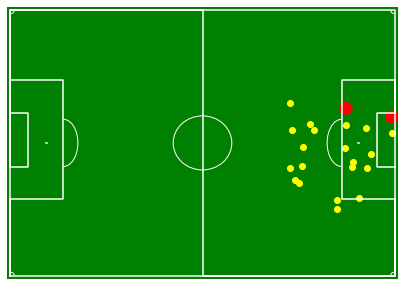

In [21]:
pitch_shots_goals_inter()

To gain a better understanding of the shots, their respective position was visualised in yellow on the pitch and the two goals were marked in red. This level of analysis is mostly suitable for further improving the tactics used by the teams. For example, it seems that Internazionale was taking quite a few shots at a large distance from the goal and neglected the left side of the opponent's box compared to the right. Both goals, however fell from this left side, which could mean that Genoa's defense was weaker on this side, which could have been exploited even more by Internazionale.

### Genoa shots

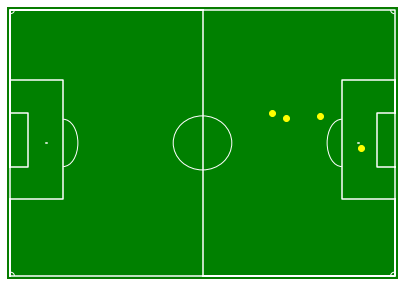

In [22]:
pitch_shots_goals_genoa()

The analysis for Genoa shows less of a clear pattern except that all but one shot were taken from outside the box, which underlines the difficulties this team had to create chances in the first place and in getting closer to the opponent's goal.

In [23]:
pass_success_rate_players()


Players By Pass Success Rate: 

              Player            Team  % Successful Passes
 Zdravko Kuzmanovic  Internazionale                 93.2
  Thomas Manfredini           Genoa                 88.5
        Isaac Cofie           Genoa                 87.2
    Hugo Campagnaro  Internazionale                 84.7
           Jonathan  Internazionale                 83.7
  Alberto Gilardino           Genoa                 83.3
      Yuto Nagatomo  Internazionale                 79.1
  Andrea Bertolacci           Genoa                 78.3
   Andrea Ranocchia  Internazionale                 76.9
  Esteban Cambiasso  Internazionale                 75.6
  Daniele Portanova           Genoa                 75.0
     Francesco Lodi           Genoa                 74.6
     Luca Antonelli           Genoa                 73.2
    Ricardo Álvarez  Internazionale                 71.4
      Sime Vrsaljko           Genoa                 69.8
   Samir Handanovic  Internazionale                 69

The success rate of passes broken down by player allows better athlete development as it highlights a certain strength or weakness of a player. Kuzmanovic stands out in this ranking, with 93.2 percent of his passes having found a team mate. This seems especially important as he assumed the position of defensive midfielder, which is usually a key position for players who are dirigating the game with their passes.

It is important to underline that, while this metric is important for any football player, it has a special importance for those assuming a central position in the midfield. Kuzmanovic's counterpart, Lodi, for example, has a considerably lower success rate in his passing, which arguably contributed to the low dominance that Genoa was able to develop in this game.

This analysis also shows the stark difference between both goalkeepers: whereas Handanovic (Internazionale) was able to get almost 70 percent of his passes to his team mates, Perin (Genoa) had the lowest success rate of all players with 44.7 percent. This also contributed to the lack of stability in Genoa's play and is a weakness that Genoa's coach should look into.

In [24]:
tackle_success_rate_players()


Players By Tackle Success Rate: 

             Player            Team  % Successful Tackles
       Juraj Kucka           Genoa                  85.7
          Jonathan  Internazionale                  80.0
   Hugo Campagnaro  Internazionale                  80.0
    Luca Antonelli           Genoa                  75.0
      Fredy Guarín  Internazionale                  75.0
   Ricardo Álvarez  Internazionale                  71.4
     Mario Santana           Genoa                  60.0
     Yuto Nagatomo  Internazionale                  50.0
   Rodrigo Palacio  Internazionale                  50.0
 Thomas Manfredini           Genoa                  50.0
       Isaac Cofie           Genoa                  33.3
 Andrea Bertolacci           Genoa                  33.3
    Francesco Lodi           Genoa                  33.3


Lastly, the share of successful tackles of individual players was examined. Obviously, this metric is of special importance for players in defense and defensive midfield. The two wingers Kucka and Jonathan, as well as the center back Campagnaro have the highest success rates in their tacklings. Especially the latter's great defensive performance can be seen to have helped stabilise the team and contributed to Internazionale keeping a clean sheet in this game.

With Cofie, Bertolacci, and Lodi, three key players in Genoa's midfield could only win every third tackle, which explains why Internazionale was able to create so many chances and dominate this game.

Final Remark:

As this analysis shows, it is possible to analyse the OPTA Sports event file for different purposes and to different degrees of detail. It was possible to show entertaining data related to the game that would help someone who, for example, missed the game, get a quick understanding of what happened.

At the same time, it was possible to do very individual analysis of both teams and even individual players, which could be very useful to coaches as it lays bare weaknesses of their teams and their opponents and shows, which players performed well in their position and why. Together with data from other games, this could allow to make more general claims about how Internazionale and Genoa could create more chances and dominate future games by repeating certain tactics or fixing certain weaknesses.